<a href="https://colab.research.google.com/github/liyanalukman/Forecasting-Tourist-Arrivals-Trends/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# load the dataset
df = pd.read_csv("/content/drive/MyDrive/arrivals_soe.csv")

In [ ]:
# check date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("Missing or invalid dates:", df['date'].isna().sum())

# check country column
df['country'] = df['country'].astype(str).str.strip().str.title()
print("Missing or invalid country values:", df['country'].isna().sum())

# check soe column
df['soe'] = df['soe'].astype(str).str.strip().str.title()
print("Missing or invalid SOE values:", df['soe'].isna().sum())

# check numeric columns
numeric_cols = ['arrivals', 'arrivals_male', 'arrivals_female']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Missing values in {col}:", df[col].isna().sum())
    print(f"Negative values in {col}:", (df[col] < 0).sum())

Missing or invalid dates: 0
Missing or invalid country values: 0
Missing or invalid SOE values: 0
Missing values in arrivals: 0
Negative values in arrivals: 0
Missing values in arrivals_male: 0
Negative values in arrivals_male: 0
Missing values in arrivals_female: 0
Negative values in arrivals_female: 0


In [ ]:
# check if amount in arrivals same as amount in arrivals_male + arrivals_female
df['arrivals_check'] = df['arrivals_male'] + df['arrivals_female']
df['mismatch'] = df['arrivals'] != df['arrivals_check']
print("Mismatched total arrivals:", df['mismatch'].sum())

Mismatched total arrivals: 0


1. Descriptive Statistical Analysis

- Summarize tourist arrivals by month, year, and region.

- Compute mean, median, standard deviation, and variance.

- Identify any noticeable shifts in average arrivals over the years.

2. Stationarity & Time Series Checks

- Plot rolling mean and standard deviation.

- Conduct Augmented Dickey-Fuller (ADF) test to check for stationarity.

- Mention if differencing or transformation is needed later for forecasting.

3. Trend Detection

- Use line plots to observe long-term trends.

- Annotate major events (e.g., 2020 pandemic) and how they affected trends.

In [ ]:
# parse date and extract year and month
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# descriptive statistics
print("Descriptive Statistics for Arrivals")

mean_val = df['arrivals'].mean()
median_val = df['arrivals'].median()
std_val = df['arrivals'].std()
var_val = df['arrivals'].var()

print(f"Mean: {mean_val:,.2f}")
print(f"Median: {median_val:,.2f}")
print(f"Standard Deviation: {std_val:,.2f}")
print(f"Variance: {var_val:,.2f}")

Descriptive Statistics for Arrivals
Mean: 908.62
Median: 0.00
Standard Deviation: 23,053.57
Variance: 531,466,878.34


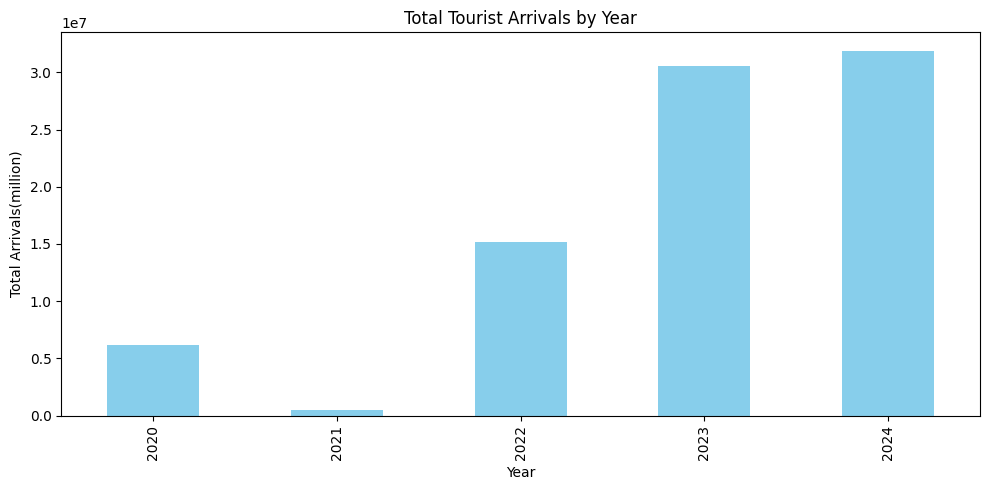

In [ ]:
# yearly tourist arrivals trend
yearly = df.groupby('year')['arrivals'].sum()
plt.figure(figsize=(10, 5))
yearly.plot(kind='bar', color='skyblue')
plt.title("Total Tourist Arrivals by Year")
plt.xlabel("Year")
plt.ylabel("Total Arrivals(million)")
plt.tight_layout()
plt.show()

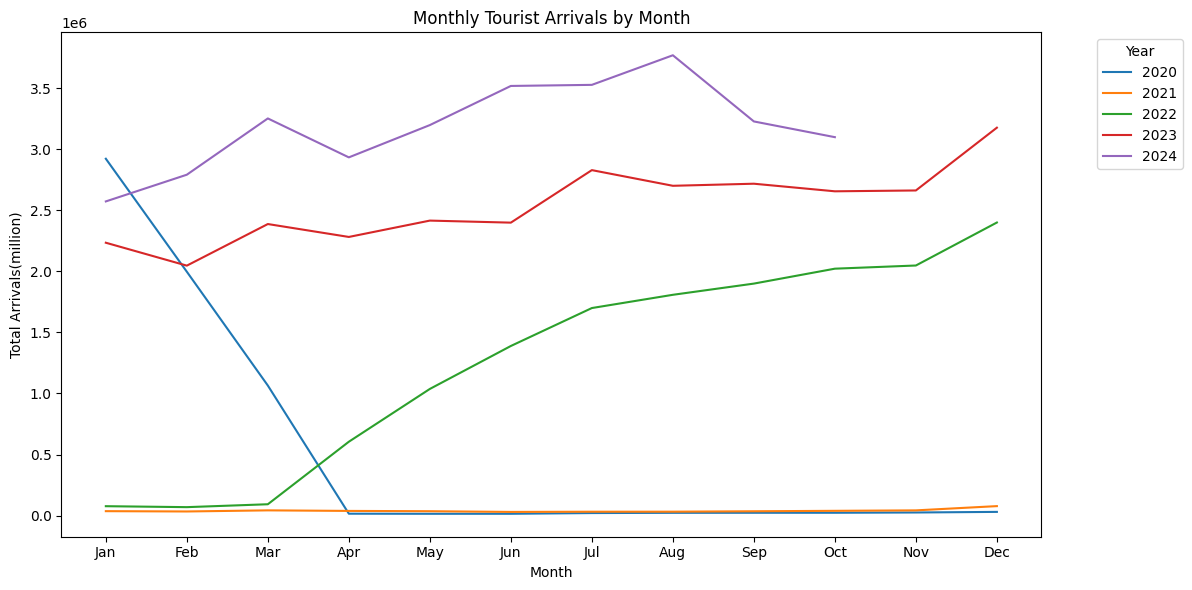

In [ ]:
# monthly tourist arrivals trend
monthly_data = df.groupby(['year', 'month'])['arrivals'].sum().reset_index()
plt.figure(figsize=(12, 6))

# plot each year's monthly trend with a unique color
for year in sorted(monthly_data['year'].unique()):
    subset = monthly_data[monthly_data['year'] == year]
    plt.plot(subset['month'], subset['arrivals'], label=str(year))

# plot formatting
plt.title("Monthly Tourist Arrivals by Month")
plt.xlabel("Month")
plt.ylabel("Total Arrivals(million)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ABW: 2 arrivals
AFG: 2,998 arrivals
AGO: 214 arrivals
AIA: 6 arrivals
ALB: 1,961 arrivals
AND: 272 arrivals
ANT: 3 arrivals
ARE: 19,165 arrivals
ARG: 18,144 arrivals
ARM: 2,459 arrivals
ATA: 6 arrivals
ATG: 666 arrivals
AUS: 1,033,044 arrivals
AUT: 39,088 arrivals
AZE: 4,900 arrivals
BDI: 189 arrivals
BEL: 60,452 arrivals
BEN: 395 arrivals
BFA: 255 arrivals
BGD: 1,274,431 arrivals
BGR: 10,663 arrivals
BHR: 7,284 arrivals
BHS: 292 arrivals
BIH: 2,457 arrivals
BLR: 12,434 arrivals
BLZ: 345 arrivals
BMU: 5 arrivals
BOL: 1,261 arrivals
BRA: 41,082 arrivals
BRB: 284 arrivals
BRN: 3,139,296 arrivals
BTN: 2,015 arrivals
BVT: 1 arrivals
BWA: 602 arrivals
CAF: 17 arrivals
CAN: 223,212 arrivals
CCK: 3 arrivals
CHE: 71,718 arrivals
CHL: 10,352 arrivals
CHN: 5,577,427 arrivals
CIV: 830 arrivals
CMR: 1,033 arrivals
COD: 509 arrivals
COG: 111 arrivals
COK: 1 arrivals
COL: 7,470 arrivals
COM: 655 arrivals
CPV: 99 arrivals
CRI: 2,559 arrivals
CUB: 982 arrivals
CYM: 1 arrivals
CYP: 2,859 arrivals
CZE: 

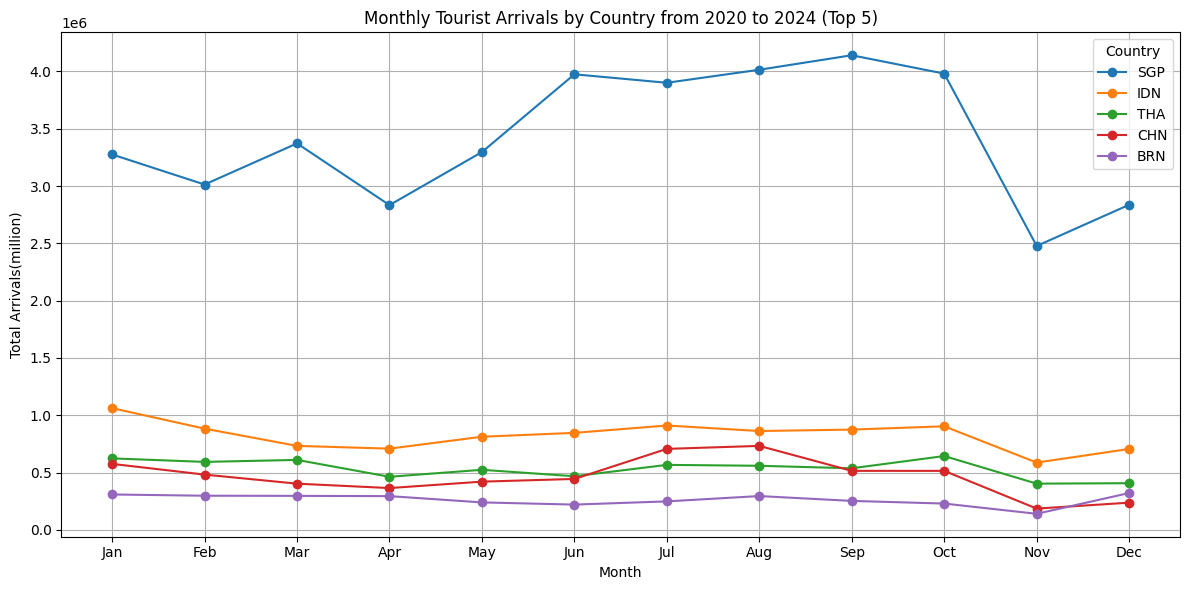

In [ ]:
# monthly tourist arrival by country
country_totals = df.groupby('country')['arrivals'].sum()
for country, total in country_totals.items():
  print(f"{country}: {int(total):,} arrivals")

# step 1: find top 5 countries by total arrivals
top_countries = df.groupby('country')['arrivals'].sum().nlargest(5).index.tolist()

# step 2: group by country and month
monthly_country = df[df['country'].isin(top_countries)]
grouped = monthly_country.groupby(['country', 'month'])['arrivals'].sum().reset_index()

# step 3: plot
plt.figure(figsize=(12, 6))
for country in top_countries:
    data = grouped[grouped['country'] == country]
    plt.plot(data['month'], data['arrivals'], marker='o', label=country)

plt.title("Monthly Tourist Arrivals by Country from 2020 to 2024 (Top 5)")
plt.xlabel("Month")
plt.ylabel("Total Arrivals(million)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()


Average arrivals per year:
   year     arrivals
0  2020   299.031395
1  2021    22.798401
2  2022   733.939535
3  2023  1527.904266
4  2024  2958.557410


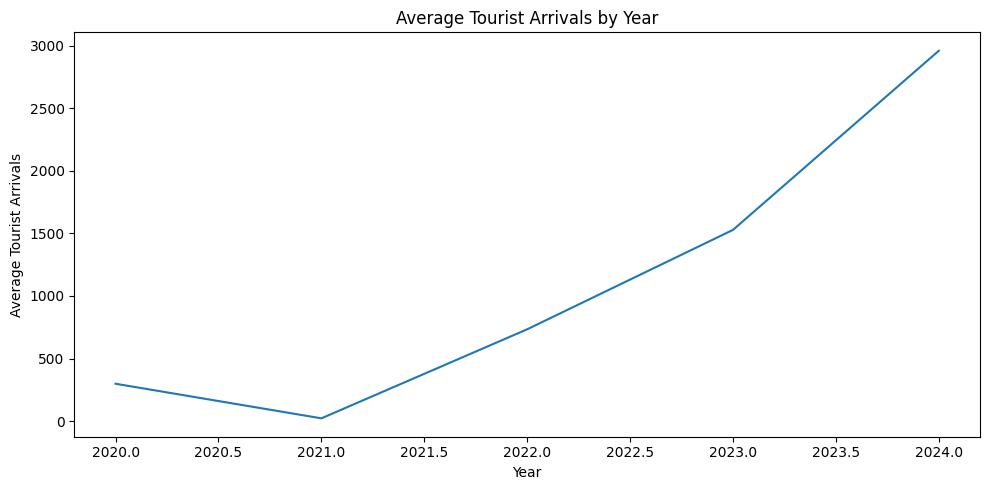

In [ ]:
# check average arrivals per year
# Extract year
df['year'] = pd.to_datetime(df['date']).dt.year

# Compute mean arrivals per year
yearly_avg = df.groupby('year')['arrivals'].mean().reset_index()

print("\nAverage arrivals per year:")
print(yearly_avg)

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg['year'], yearly_avg['arrivals'], linestyle='-')
plt.title("Average Tourist Arrivals by Year")
plt.xlabel("Year")
plt.ylabel("Average Tourist Arrivals")
plt.tight_layout()
plt.show()


<ipython-input-17-c095cc09babd>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ts = df['arrivals'].resample('M').sum()


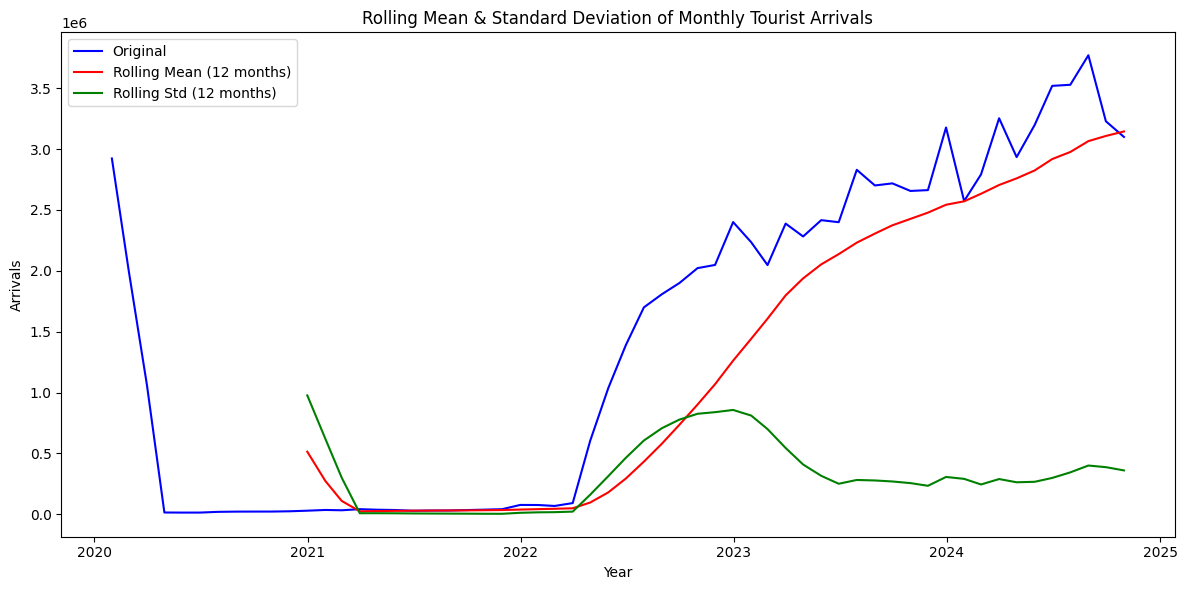

ADF Statistic: -0.8051967337792763
p-value: 0.8175907981455744
Critical Values:
   1%: -3.5507
   5%: -2.9138
   10%: -2.5946


In [ ]:
# prepare time series
# Resample monthly total arrivals
df = df.set_index(pd.to_datetime(df['date']))
monthly_ts = df['arrivals'].resample('M').sum()

# plot rolling mean & std dev

rolling_mean = monthly_ts.rolling(window=12).mean()
rolling_std = monthly_ts.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(monthly_ts, label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (12 months)', color='red')
plt.plot(rolling_std, label='Rolling Std (12 months)', color='green')
plt.title('Rolling Mean & Standard Deviation of Monthly Tourist Arrivals')
plt.xlabel('Year')
plt.ylabel('Arrivals')
plt.legend()
plt.tight_layout()
plt.show()

# augmented dickey-fuller (ADF) test
adf_result = adfuller(monthly_ts.dropna())

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")


❌ Not Stationary
- The p-value (0.8176) is much greater than 0.05, which means we fail to reject the null hypothesis (that the series has a unit root).

- In simpler terms: The time series is non-stationary.

📉 ADF Statistic vs Critical Values
- ADF Statistic (-0.8052) is less negative than all critical values, confirming non-stationarity.



<ipython-input-19-d849deb7dfec>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ts = df['arrivals'].resample('M').sum()


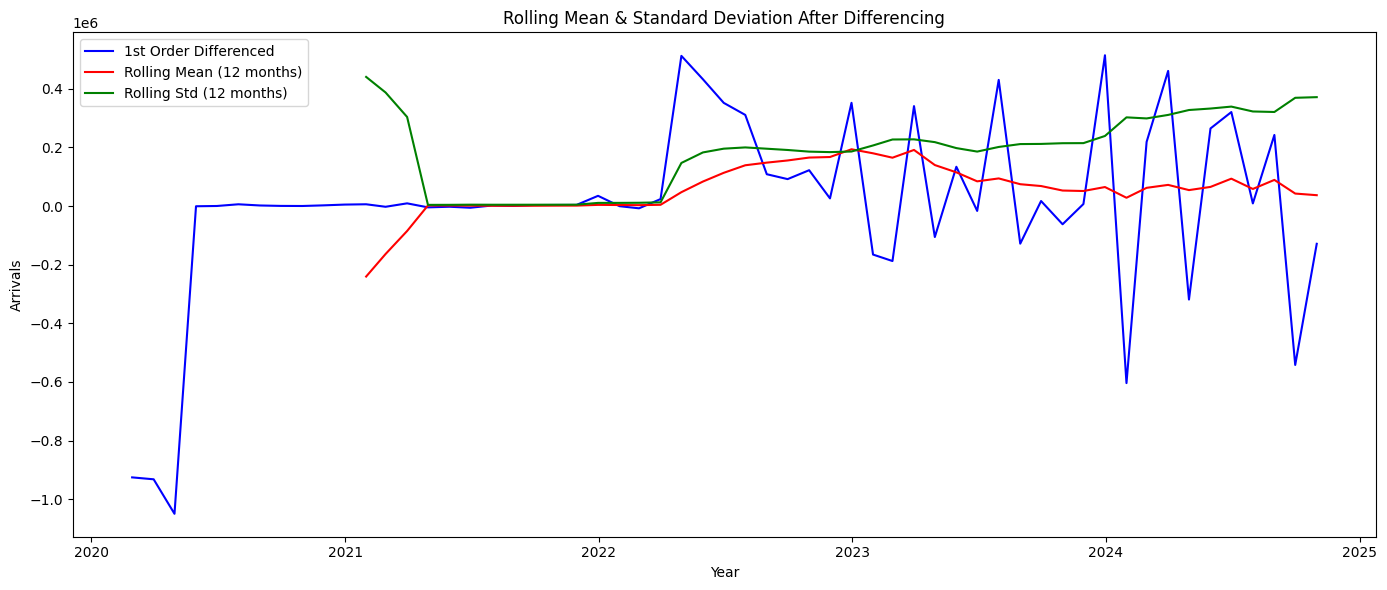

In [ ]:
# # First differencing
# monthly_diff = monthly_ts.diff().dropna()

# adf_result_diff = adfuller(monthly_diff)

# print("ADF Statistic (1st diff):", adf_result_diff[0])
# print("p-value:", adf_result_diff[1])

df.index = pd.to_datetime(df.index)
monthly_ts = df['arrivals'].resample('M').sum()

# Group by month: total monthly arrivals across all countries and SOEs
# monthly_arrivals = df['arrivals'].resample('M').sum()

# Apply first-order differencing
diff_arrivals = monthly_ts.diff().dropna()

adf_result_diff = adfuller(diff_arrivals)

# Compute rolling mean and std (12 months)
rolling_mean = diff_arrivals.rolling(window=12).mean()
rolling_std = diff_arrivals.rolling(window=12).std()

# Plot the differenced series with rolling stats
plt.figure(figsize=(14, 6))
plt.plot(diff_arrivals, label='1st Order Differenced', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (12 months)', color='red')
plt.plot(rolling_std, label='Rolling Std (12 months)', color='green')
plt.title('Rolling Mean & Standard Deviation After Differencing')
plt.xlabel('Year')
plt.ylabel('Arrivals')
plt.legend()
plt.tight_layout()
plt.show()


The Series is Now Stationary
- The p-value is far below 0.05, so we reject the null hypothesis.

- The ADF statistic (-5.95) is much lower than all critical values.

- Conclusion: After first differencing, the series is stationary.

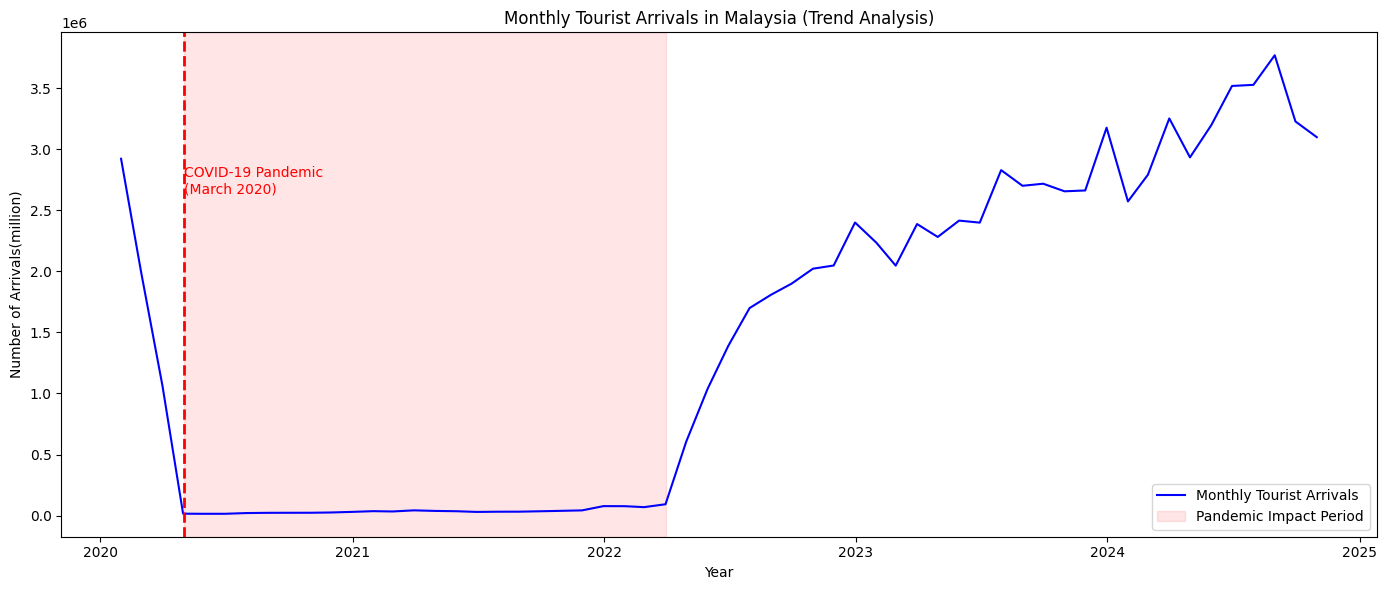

In [ ]:
# Plot Monthly Tourist Arrivals with Trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_ts, label='Monthly Tourist Arrivals', color='blue')

# Add annotation for COVID-19 pandemic in early 2020
plt.axvline(pd.to_datetime('2020-05-01'), color='red', linestyle='--', linewidth=2)
plt.text(pd.to_datetime('2020-05-01'),
         monthly_ts.max()*0.7,
         'COVID-19 Pandemic\n(March 2020)',
         color='red')

# Optional: Add pre-pandemic and post-pandemic shading
plt.axvspan(pd.to_datetime('2020-05-01'), pd.to_datetime('2022-04-01'),
            color='red', alpha=0.1, label='Pandemic Impact Period')

plt.title('Monthly Tourist Arrivals in Malaysia (Trend Analysis)')
plt.xlabel('Year')
plt.ylabel('Number of Arrivals(million)')
plt.legend()
plt.tight_layout()
plt.show()
